<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Etude AdultCensus en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>

## Objectif

A partir d'un recensement sur la population américaine datant de 1994, on cherche à prévoir le dépassement d'un seuil de niveau de revenus.

On va commencer par nettoyer les données, c'est-à-dire enlever les données manquantes ou aberrantes. Puis nous créerons des nouvelles variables et en regrouperons certaines.
Ensuite on va réaliser une analyse descriptive des données pour les prendre en main.

**Résumé**
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
### Objectif
A refaire

### Présentation des données
#### Les variables

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K



# <FONT COLOR="Red">Épisode 1 <i>Data Munging </i></font> 
## Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 

Il fait appel à des outils classiques de statistique descriptive. 

Les données sont anonymisées et datent du siècle dernier, elles n'ont plus d'intérêt "commercial". De façon générale, plutôt que de conserver tous les fichiers de données intermédiaires à une étude, ce qui peut nécessiter beaucoup d'espace disque, il est important, voire crucial, d'archiver *tous* les programmes intermédiaires de saisie, sélection, transformation des données. En effet, en cas de problème ou même simplement d'un mauvais choix méthodologique, il faut pouvoir rapidement repartir d'une étape précédente. 

La production d'un calepin aide à cette mémoire lors de l'analyse préliminaire mais ne constitue pas un code opérationnel.

### Lecture des données

In [1]:
import pandas as pd
import numpy as np
import numpy.random as npr

# Prédiction

import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import sklearn.ensemble as skle 
# Affichage

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(style="white", context="talk")
%matplotlib inline

import warnings

pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\Emmeline\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Données déjà nettoyées, à refaire, on le garde pour vérification
path=""
adult_clean = pd.read_csv(path + 'adultCensus.csv', sep=',', header=0, index_col=None)
adult_clean

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.000000,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.000000,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.000000,Ag2,HW2
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,incLow,0.000000,0.000000,Ag4,HW1
7,52,Self-Employed,209642,HS-grad,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,incHigh,0.000000,0.000000,Ag5,HW3
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,incHigh,9.552866,0.000000,Ag2,HW3
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,incHigh,8.552367,0.000000,Ag4,HW2


In [2]:
path=""
colNames=["age", "workClass", "fnlwgt", "education", "educNum","mariStat", "occup", "relationship", "origEthn","sex", "capitalGain", "capitalLoss", "hoursWeek","nativCountry", "income"]
adult = pd.read_csv(path + 'adult.data', sep=',', header=None, index_col=None)
adult.columns = colNames
adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Toutes les colonnes ont bien été importées, la première correspond à un identifiant unique pour chaque personne recensée.
On va à présent préparer les données en commençant par affecter le bon type aux variables qualitatives.

In [3]:
def create_categorical_data(df, column_name) :
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    return cat_columns

Pour chaque variable, on liste les différentes modalités possibles puis on effectue des regroupements pour les simplifier. 
On fait ici le choix d'utiliser la fonction `map` en précisant aussi les modalités que l'on ne veut pas changer, ainsi les cellules ne contenant pas les valeurs attendues (par exemple '?') seront transformées en Nan.

In [4]:
print(np.sort(adult["mariStat"].unique()))

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [5]:
# mariStat
cat_name_dic = {" Never-married" : "Never-Married", " Married-AF-spouse" : "Married", 
                                           " Married-civ-spouse" : "Married", " Married-spouse-absent" : "Not-Married",
                                          " Separated" : "Not-Married", " Divorced" : "Not-Married", " Widowed" : "Widowed"}
adult['mariStat'] = adult.mariStat.map(cat_name_dic)

In [6]:
print(np.sort(adult["nativCountry"].unique()))

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [7]:
# nativCountry
cat_country = {" Cambodia" : "SE-Asia", " Canada" : "British-Commonwealth", " China" : "China", " Columbia" : "South-America", " Cuba" : "Other",
              " Dominican-Republic" : "Latin-America", " Ecuador" : "South-America", " El-Salvador" : "South-America",
              " England" : "British-Commonwealth", " France" : "Euro_1", " Germany" : "Euro_1", " Greece" : "Euro_2", 
              " Guatemala" : "Latin-America", " Haiti" : "Latin-America", " Holand-Netherlands" : "Euro_1", " Honduras" : "Latin-America",
              " Hong" : "China", " Hungary" : "Euro_2", " India" : "British-Commonwealth", " Iran" : "Other", " Ireland" : "British-Commonwealth",
              " Italy" : "Euro_1", " Jamaica" : "Latin-America", " Japan" : "Other", " Laos" : "SE-Asia", " Mexico" : "Latin-America",
              " Nicaragua" : "Latin-America", " Outlying-US(Guam-USVI-etc)" : "Latin-America", " Peru" : "South-America", 
              " Philippines" : "SE-Asia", " Poland" : "Euro_2", " Portugal" : "Euro_2", " Puerto-Rico" : "Latin-America",
              " Scotland" : "British-Commonwealth", " South" : "Euro_2", " Taiwan" : "China", " Thailand" : "SE-Asia",
              " Trinadad&Tobago" : "Latin-America", " Vietnam" : "SE-Asia", " United-States" : "United-States",
              " Yugoslavia" : "Euro_2"}
adult["nativCountry"] = adult.nativCountry.map(cat_country)#.fillna(adult.nativCountry)

In [8]:
print(np.sort(adult["education"].unique()))

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [9]:
# education
cat_educ = {" 10th" : "Dropout", " 11th" : "Dropout", " 12th" : "Dropout", " 1st-4th" : "Dropout", " 5th-6th" : "Dropout",
           " 7th-8th" : "Dropout", " 9th" : "Dropout", " Assoc-acdm" : "Associates", " Assoc-voc" : "Associates", 
           " Bachelors" : "Bachelors", " Doctorate" : "Doctorate", " HS-grad" : "HS-grad", " Masters" : "Masters",
           " Preschool" : "Dropout", " Prof-school" : "Prof-School", " Some-college" : "HS-Graduate"}
adult["education"] = adult.education.map(cat_educ)

In [10]:
print(np.sort(adult["workClass"].unique()))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [11]:
# workClass
cat_work = {" Federal-gov" : "Federal-Govt", " Local-gov" : "Other-Govt", " State-gov" : "Other-Govt", " Private" : "Private",
           " Self-emp-inc" : "Self-Employed", " Self-emp-not-inc" : "Self-Employed", " Without-pay" : "Not-Working",
           " Never-worked" : "Not-Working"}
adult["workClass"] = adult.workClass.map(cat_work)

In [12]:
print(np.sort(adult["occup"].unique()))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


Ici, puisque les observations valant `Armed Forces` sont ensuite abandonnées, on fait le choix de les mettre directement à Nan.

In [13]:
# occup
cat_occup = {" Adm-clerical" : "Admin", " Craft-repair" : "Blue-Collar", " Exec-managerial" : "White-Collar",
            " Farming-fishing" : "Blue-Collar", " Handlers-cleaners" : "Blue-Collar", " Machine-op-inspct" : "Blue-Collar",
            " Other-service" : "Service", " Priv-house-serv" : "Service", " Prof-specialty" : "Professional",
            " Protective-serv" : "Other-occups", " Sales" : "Sales", " Tech-support" : "Other-occups", " Transport-moving" : "Blue-Collar"}
adult["occup"] = adult.occup.map(cat_occup)

In [14]:
print(np.sort(adult["origEthn"].unique()))

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [15]:
# origEthn
cat_orig = {" White" : "White", " Black" : "Black", " Amer-Indian-Eskimo" : "Amer-Indian", " Asian-Pac-Islander" : "Asian",
            " Other" : "Other"}
adult["origEthn"] = adult.origEthn.map(cat_orig)

### Création de nouvelles variables

In [16]:
adult["LcapitalGain"] = np.log(1 + adult["capitalGain"])
adult["LcapitalLoss"] = np.log(1 + adult["capitalLoss"])

# capital
def quantileCapitalGain(capital):
    if type(capital) != int :
        result = np.nan
    elif capital <= 0 :
        result = "None"
    elif capital <= np.median(adult[adult["capitalGain"] > 0]["capitalGain"]) :
        result = "cgLow"
    else :
        result = "cgHigh"
    return result

adult["capitalGain"] = list(map(quantileCapitalGain, adult.capitalGain))

def quantileCapitalLoss(capital):
    if type(capital) != int :
        result = np.nan
    elif capital <= 0 :
        result = "None"
    elif capital <= np.median(adult[adult["capitalLoss"] > 0]["capitalLoss"]):
        result = "clLow"
    else :
        result = "clHigh"
    return result

adult["capitalLoss"] = list(map(quantileCapitalLoss, adult.capitalLoss))

In [17]:
adult["ageQ"] = pd.qcut(adult.age, 5, labels=["Ag1", "Ag2", "Ag3", "Ag4", "Ag5"])

A présent on va rendre la variable `hoursWeek` qualitative en définissant les différentes classes.

In [18]:
adult["hoursWeekQ"] = pd.cut(adult.hoursWeek, bins=np.array([0, 39, 41, 100]), labels=["HW1", "HW2", "HW3"])

In [19]:
def create_categorical_data_rename(df, column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [20]:
print(np.sort(adult["income"].unique()))

[' <=50K' ' >50K']


In [21]:
adult["income"] = create_categorical_data_rename(adult, "income", {" <=50K" : "incLow", " >50K" : "incHigh"})

In [22]:
for name in ["workClass", "education", "mariStat", "occup", "relationship", "origEthn", "sex", "capitalGain", "capitalLoss", "nativCountry"] :
    adult[name] = create_categorical_data(adult, name)

### Nettoyage des lignes incomplètes

In [23]:
adult = adult[np.logical_not(adult.isnull().any(axis=1))]

adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.000000,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.000000,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.000000,Ag2,HW2
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,incLow,0.000000,0.000000,Ag4,HW1
7,52,Self-Employed,209642,HS-grad,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,incHigh,0.000000,0.000000,Ag5,HW3
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,incHigh,9.552866,0.000000,Ag2,HW3
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,incHigh,8.552367,0.000000,Ag4,HW2


On a maintenant bien nettoyé les données, il ne devrait plus rester de valeurs non affectées. On peut passer à la partie descriptive.

## 2 Description

In [24]:
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.0,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.0,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.0,Ag2,HW2


In [25]:
adult.describe()

,age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,30153.000000,3.015300e+04,30153.000000,30153.000000,30153.000000,30153.000000
mean,38.440354,1.897862e+05,10.121315,40.931317,0.743869,0.355082
std,13.135197,1.056591e+05,2.550162,11.979579,2.470854,1.594700
min,17.000000,1.376900e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176180e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,11.512925,8.379539


**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

In [26]:
print(adult.shape)

(30153, 19)


On étudie les résultats d'un recensement portant sur 30153 adultes américains.

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry`, certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

Les modalités des variables `mariStat`, `nativCountry`, `education`, `workClass`, `occup` et `origin` ont été regroupées. 

Deux nouvelles variables `LcapitalGain` et `LcapitalLoss` sont créées et valent respectivement $\log (1 + capitalGain)$ et $\log (1 + capitalLoss)$.

Les deux variables `capitalGain` et `capitalLoss` sont rendues qualitatives et valent None, Low ou High suivant si elles sont négatives, inférieures à leur médiane ou supérieures.


C:\Users\Emmeline\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


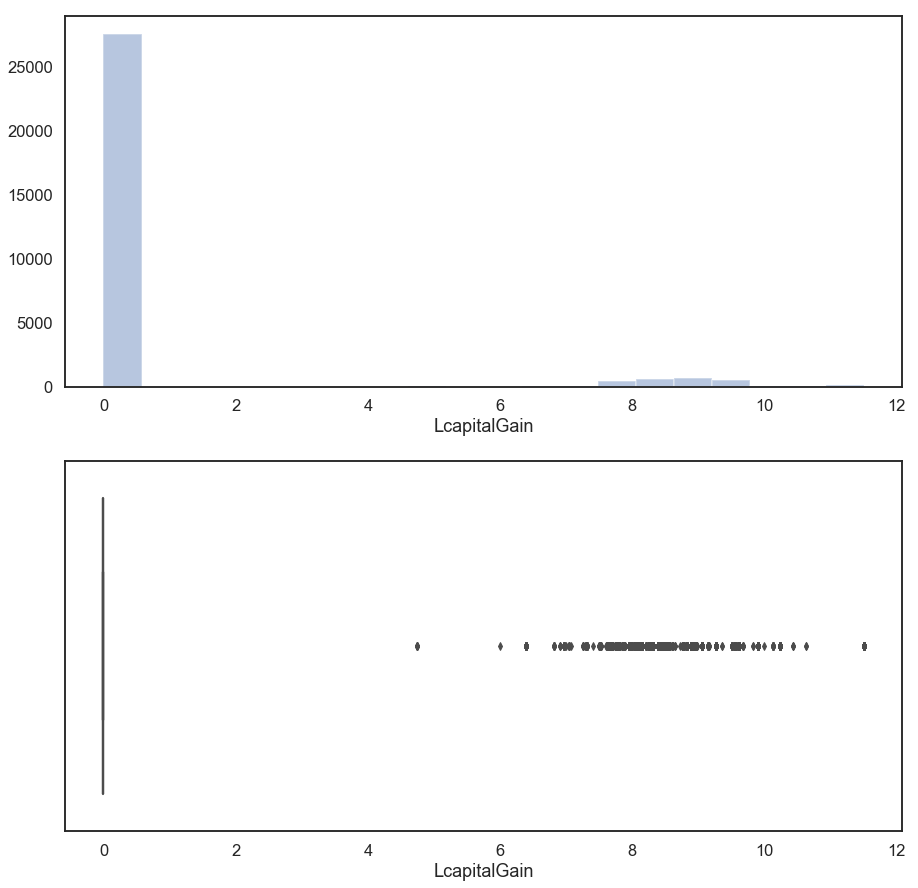

In [27]:
#warnings.filterwarnings('ignore')  # En attendant le correctif version 0.9.0
fig, axs = plt.subplots(2, 1, figsize=(15,15))
sns.distplot(adult["LcapitalGain"], hist=True, kde=False, bins=20, ax=axs[0])
sns.boxplot(adult["LcapitalGain"], orient="h", ax=axs[1])
fig.show()

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

Ces deux graphiques sont un histogramme et un boxplot de la variable `LcapitalGain`. La transformation permet de bien séparer les valeurs à None des autres. Cependant les deux modalités Low et High ne sont pas séparées sur ces graphiques. On remarque que la modalité None est très majoritaire dans l'échantillon.

In [28]:
adult["capitalGain"].describe()

count     30153
unique        3
top        None
freq      27615
Name: capitalGain, dtype: object

Certains couples de variables posent des problèmes. 

In [29]:
pd.crosstab(adult["relationship"], adult["sex"])

sex,Female,Male
relationship,,
Husband,1,12460
Not-in-family,3566,4156
Other-relative,386,501
Own-child,1961,2504
Unmarried,2463,749
Wife,1405,1


In [30]:
pd.crosstab(adult["education"], adult["educNum"])

educNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
Associates,0,0,0,0,0,0,0,0,0,0,1307,1008,0,0,0,0
Bachelors,0,0,0,0,0,0,0,0,0,0,0,0,5043,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,375
Dropout,45,151,288,557,455,820,1048,376,0,0,0,0,0,0,0,0
HS-Graduate,0,0,0,0,0,0,0,0,0,6676,0,0,0,0,0,0
HS-grad,0,0,0,0,0,0,0,0,9836,0,0,0,0,0,0,0
Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,1626,0,0
Prof-School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,542,0


In [31]:
pd.crosstab(adult["mariStat"], adult["relationship"])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
mariStat,,,,,,
Married,12461,14,118,84,0,1406
Never-Married,0,4444,547,3928,801,0
Not-Married,0,2832,182,441,2068,0
Widowed,0,432,40,12,343,0


In [32]:
pd.crosstab(adult["origEthn"], adult["nativCountry"])

nativCountry,British-Commonwealth,China,Euro_1,Euro_2,Latin-America,Other,SE-Asia,South-America,United-States
origEthn,,,,,,,,,
Amer-Indian,0,1,1,2,9,0,1,1,270
Asian,88,122,2,71,6,43,290,0,273
Black,9,0,7,0,164,6,1,1,2628
Other,6,0,1,0,86,5,0,20,113
White,225,6,213,146,783,139,12,191,24211


**Q** Quel est ce problème général ? **Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ?** Quel est le problème plus spécifique des variables `relationship` et `sex`?

Le problème est que les informations apportées par ces couples de variables sont souvent redondantes. Dans les analyses suivantes, il faudra à chaque fois ne se servir que d'une des deux pour ne pas prendre en compte deux fois la même information.

**Il va se passer quoi ? **


Les valeurs Wife et Husband de la variable `relationship` portent déjà l'information de la variable `sex`. On remarque d'ailleurs une probable erreur de saisie avec un homme marqué Wife et une femme Husband. L'échantillon étant très large, on décide de supprimer ces deux observations.

In [33]:
adult = adult[(adult["sex"] != "Female") | (adult["relationship"] != "Husband")]
adult = adult[(adult["sex"] != "Male") | (adult["relationship"] != "Wife")]

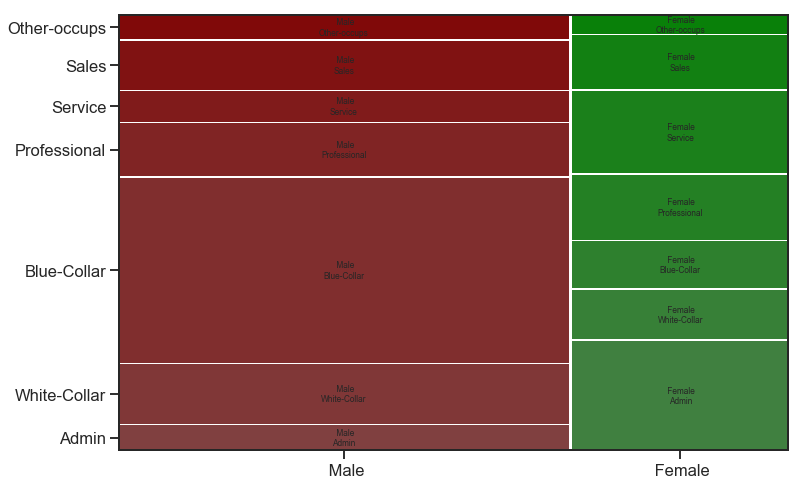

In [34]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize=(12, 8))
mosaic(adult, ["sex", "occup"], ax=ax)
plt.show()

**Q** Quel graphique ci-dessus?  Quelle interprétation ? Quel est le test ci-dessous ? Que doit vérifier la table pour que ce test soit valide ? Quelle est l’hypothèse H0 testée ? Conclusion.

Ce graphique est un mosaic plot de la variable `occup` en fonction de la variable `sex`. On observe que la variable `sex` est un facteur qui influe sur le type d'emploi occupé, en effet les emplois administratifs et de service représentent une part beaucoup plus importante chez les femmes que chez les hommes. A l'inverse, la catégorie Blue Collar est sur-représentée chez les hommes. Les profils ne sont pas les mêmes pour les femmes et les hommes.

Le test ci-dessous est un test d'indépendance du Chi-deux, il permet de vérifier si les deux variables `occup` et `sex` sont indépendantes, ou non comme le suggèrent les profils.

Il faut que l'effectif observé dans chaque cellule soit suffisamment grand ( $\geq 5$ environ)

L'hypothèse H0 est que les deux variables `occup` et `sex` sont indépendantes.

La p-valeur est très proche de 0, donc on rejette l'hypothèse et les variables ne sont pas indépendantes.

In [35]:
import scipy.stats
tab = pd.crosstab(adult["sex"], adult["occup"])
print(scipy.stats.chi2_contingency(tab)[1])

0.0


**Q** Quel est le graphique ci-dessous? Comment interpréter? Quel test permettrait de confirmer ? Que dire de l’intérêt de cette variable [fnlwgt](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) (Final sampling weight)?

Ce graphique est un boxplot de la variable `fnlwgt` en fonction de `income`. On observe que cette variable influe très peu sur la variable cible, on peut donc la négliger pour la suite de notre étude. On pourrait faire un test d'indépendance pour le vérifier.

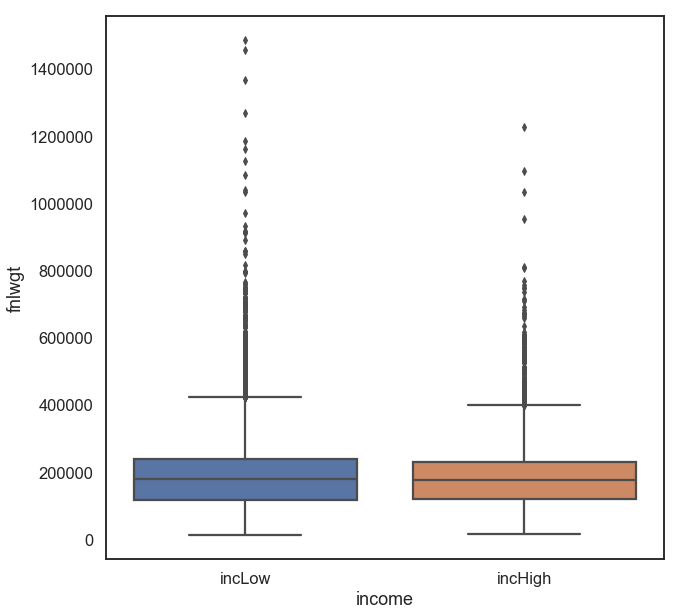

In [36]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(adult["income"], adult["fnlwgt"], orient='v')
plt.show()

**Q** Que dire dans la figure ci-dessous de la liaison entre les variables `educNum` et `age` et de la localisation des points noirs (>50k€) par rapport aux rouges (<50k€) ?

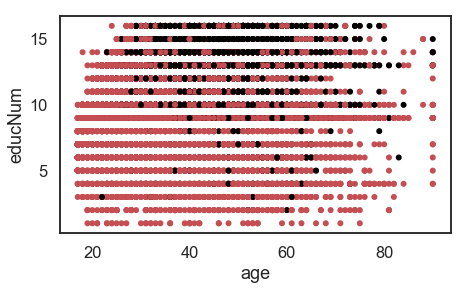

In [37]:
fig, ax = plt.subplots(figsize=(7, 4))
col = adult["income"].map({"incHigh":'black', "incLow":'r'})
adult.plot.scatter(x="age", y="educNum", c=col, alpha=1, ax=ax)
plt.show()

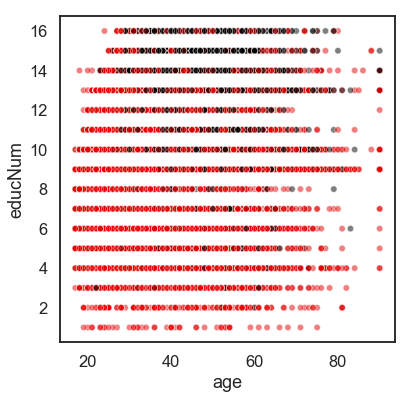

In [38]:
# On enlève celui-là non ?

if sns.__version__ >= "0.9.0" :
    plt.figure(figsize=(6, 6))
    col = adult["income"].map({"incHigh":'black', "incLow":'r'})
    palette = sns.xkcd_palette(['red', 'black'])
    sns.scatterplot(x=adult["age"], y=adult["educNum"], hue=adult["income"], palette=palette, alpha=0.5, size=3, markers='.', legend=False)
    plt.show()
else :
    print("Seaborn pas à jour")

On observe que les hauts revenus correspondent généralement aux personnes avec un haut niveau d'éducation et ayant entre 35 et 65 ans.

On va essayer d'ajuster un modèle linéaire sur ces deux variables pour voir si elles permettent de prédire le dépassement du seuil de revenu de manière satisfaisante.

In [39]:
reglin = sklm.LinearRegression(n_jobs=-1)
X_train, X_test, Y_train, Y_test = skms.train_test_split(adult[["educNum", "age"]], adult["income"].map({"incHigh" : 1, "incLow" : 0}), test_size=10000)

In [101]:
pred = reglin.fit(X_train, Y_train).predict(X_test)

In [102]:
np.count_nonzero(pred[pred > 0.2])

5899

In [103]:
df_pred = pd.DataFrame({"pred" : pred})

In [104]:
df_pred["dep_seuil"] = df_pred["pred"] > 0.5
df_pred["dep_seuil"] = df_pred["dep_seuil"].map(int)

In [105]:
df_pred

,pred,dep_seuil
0,0.181632,0
1,0.214007,0
2,0.434303,0
3,0.373894,0
4,0.147919,0
5,0.052457,0
6,0.459010,0
7,0.089173,0
8,0.252062,0
9,0.103860,0


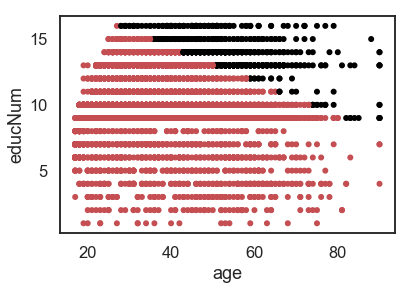

In [45]:
X_test.plot.scatter(x="age", y="educNum", c=df_pred["dep_seuil"].map({1:'black', 0:'r'}))
plt.show()

Pas terrible du tout, test avec RandomForest :

In [46]:
forest = skle.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2,
                                     min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True,
                                     oob_score=True)

pred = forest.fit(X_train, Y_train).predict(X_test)
df_pred = pd.DataFrame({"pred" : pred})

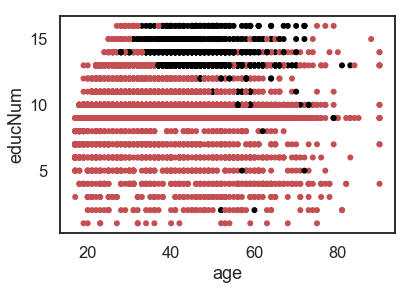

In [47]:
X_test.plot.scatter(x="age", y="educNum", c=df_pred["pred"].map({1:'black', 0:'r'}))
plt.show()

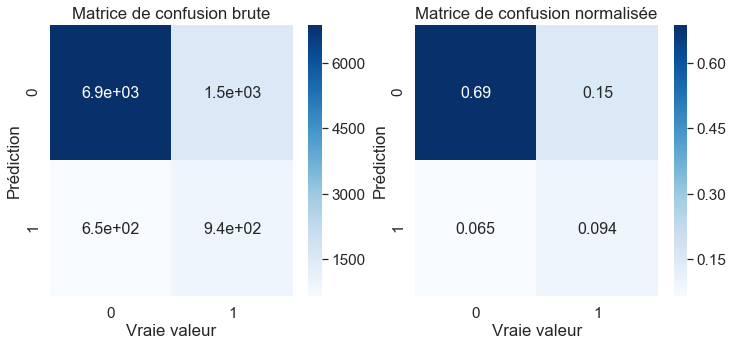

In [73]:
table = pd.crosstab(pred, Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize=False) # margins=True, margins_name="Total")
table_norm = pd.crosstab(pred, Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize="all")
sns.set(font_scale=1.4)  #for label size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(table, annot=True, cmap="Blues", ax=ax[0], annot_kws={"size": 16})  # font size
ax[0].set_title("Matrice de confusion brute")
sns.heatmap(table_norm, annot=True, cmap="Blues", ax=ax[1], annot_kws={"size": 16}) # font size
ax[1].set_title("Matrice de confusion normalisée")
plt.show()

C'est mieux mais pas ouf quand même.

#### Avec modèle de régression logistique

In [53]:
logit = sklm.LogisticRegression(multi_class='ovr')

In [69]:
logit_pred = logit.fit(X_train, Y_train).predict(X_test)

In [70]:
df_logit_pred = pd.DataFrame({'pred':logit_pred})

In [71]:
df_logit_pred

,pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


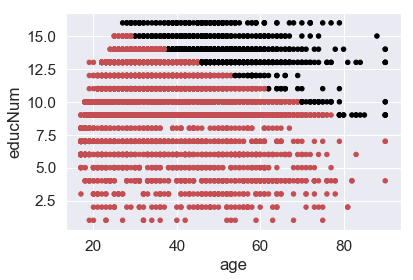

In [72]:
X_test.plot.scatter(x="age", y="educNum", c=df_logit_pred['pred'].map({1:'black', 0:'r'}))
plt.show()

In [67]:
logit.score(X_test, Y_test)

0.7788

Finalement, l'analyse du modèle de régression logistique fait également ressortir le lien entre un âge avancé, un haut niveau d'éducation et un haut niveau de revenus.

In [82]:
verif = logit.fit(X_train, Y_train).predict_proba(X_test)

In [86]:
df_verif = pd.DataFrame({'pred' : verif[:,1]})
df_verif["dep_seuil"] = df_verif["pred"] > 0.5
df_verif["dep_seuil"] = df_verif["dep_seuil"].map(int)
df_verif

,pred,dep_seuil
0,0.144955,0
1,0.168224,0
2,0.436420,0
3,0.363239,0
4,0.119094,0
5,0.070253,0
6,0.494559,0
7,0.086349,0
8,0.210044,0
9,0.093677,0


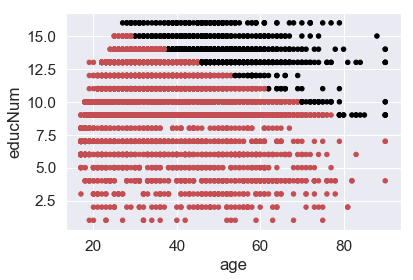

In [87]:
X_test.plot.scatter(x="age", y="educNum", c=df_verif['dep_seuil'].map({1:'black', 0:'r'}))
plt.show()

Au final je retombe sur la même chose en prenant les probas prédites et en fixant un seuil d'appartenance à 0.5.

In [119]:
len(df_pred[df_pred["dep_seuil"]<df_verif["dep_seuil"]])
# y en a 329 de plus à incHigh avec logit

329

In [123]:
print("score avec le logit", logit.score(X_test, Y_test))
print("score avec ML", reglin.score(X_test, Y_test))

score avec le logit 0.7788
score avec ML 0.1618235997769779


Au final ça n'a pas grand intérêt de comparer les scores car le score pour le modèle linéaire ne veut rien dire étant donné qu'on transforme nos résultats en qualitatif après.

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)


**Q** Quel est le graphe ci-dessous? Quel est le cercle?  A quoi sert-il ?

Ce graphe est la carte factorielle associée aux deux premières composantes de l'ACP. Elle permet de visualiser à quel axe contribue chaque variable, c'est-à-dire que représentent les deux premiers axes.

Le cercle des corrélations permet de voir à quel point les variables sont bien représentées sur les deux plans factoriels, plus la flèche est proche du cercle plus la variable est bien représentée.

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# définition de la commande
pca = PCA()
# Liste des variables quantitatives
quantit = [name for name in list(adult) if (adult[name].dtype.name != "category" and name != "fnlwgt")]
# Sélection des variables quantitatives
dat = adult[quantit]
# réduction
data = pd.DataFrame(scale(dat), columns=dat.columns)
# composantes principales
C = pca.fit_transform(data)

C:\Users\paul-\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


On enlève `fnlwgt` de l'ACP car on a vu que cette variable n'avait pas grand intérêt pour prédire la variable cible.

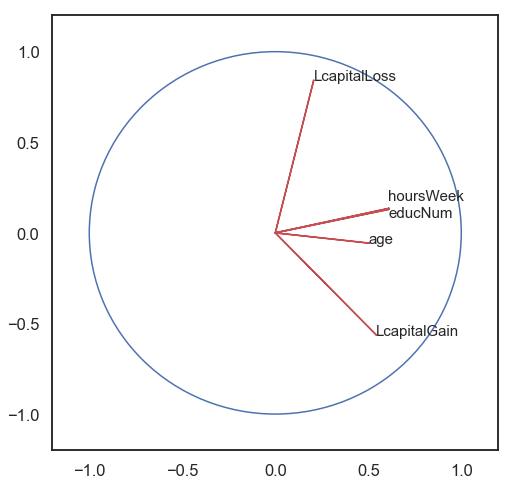

In [41]:
# coordonnées des variables
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(8,8))

for i, j, nom in zip(coord1, coord2, data.columns):
    if nom == "hoursWeek":
        plt.text(i, j + 0.05, nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    elif nom == "educNum":
        plt.text(i, j - 0.05, nom, size=15)
    else:
        plt.text(i, j, nom, size=15)
    plt.arrow(0, 0, i, j, color='r')
plt.axis((-1.2,1.2,-1.2,1.2))

cercle = plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(cercle)
plt.show()

L'axe 1 représente le volume de travail par semaine et le niveau d'éducation. Les individus situés plus à droite travaillent plus et ont probablement de meilleurs salaires grâce à un plus haut niveau d'éducation.

Le deuxième axe représente la différence entre les pertes et les gains de capitaux.

**Q** La représentation ci-dessous montre un artefact avec 3 paquets d’individus. A quoi est dû cet artéfact ? Est-il utile à la compréhension des données ? 

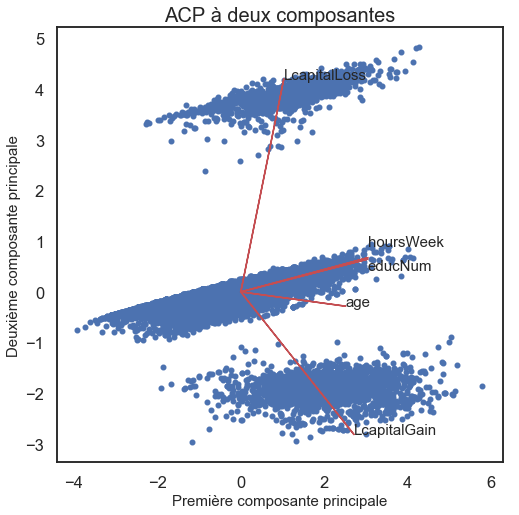

In [42]:
fig = plt.figure(figsize = (8,8))

echelle = 5
plt.xlabel('Première composante principale', fontsize = 15)
plt.ylabel('Deuxième composante principale', fontsize = 15)
plt.title('ACP à deux composantes', fontsize = 20)
plt.scatter(C[:,0], C[:,1], marker='.')
for i, j, nom in zip(coord1,coord2, data.columns):
    if nom == "hoursWeek":
        plt.text(echelle * i, echelle * (j + 0.05), nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    elif nom == "educNum":
        plt.text(echelle * i, echelle * (j - 0.05), nom, size=15)
    else:
        plt.text(echelle * i, echelle * j, nom, size=15)
        
    plt.arrow(0, 0, echelle * i, echelle * j, color='r')
plt.show()

On retrouve bien les trois paquets d'individus, cela semble être dû au fait que le gain ou la perte de capital est une variable très influente, c'est l'axe qui permet de séparer les trois groupes.

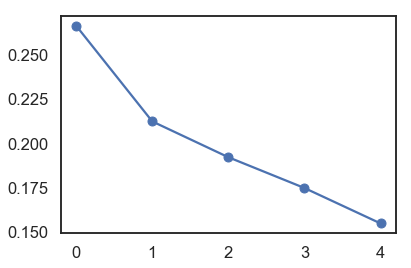

In [43]:
# Eboulis des valeurs propres
plt.figure()
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.show()

On observe un coude au niveau de la deuxième valeur propre, ce qui justifie de ne garder que les deux premières composantes principales pour l'ACP.

## 4 [Analyse factorielle des correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) de la table `occup` *vs.* `education`
**Q** Que conclure du test ci-dessous sur l’intérêt d’une analyse des correspondances? Quelle est la table étudiée, ses dimensions?


In [44]:
table = pd.crosstab(adult["occup"], adult["education"])
print(scipy.stats.chi2_contingency(tab)[1])

0.0


Il permet de savoir s'il est utile de faire l'analyse des correspondances. Ici, on rejette H0 donc les variables `occup` et `education` sont liées et il est utile de faire l'analyse des correspondances.

**Q** Quelles sont les ACPs considérées dans cette analyse des correspondances, avec quelles métriques?

Les ACP à faire sont celles des profils-lignes et des profils-colonnes, avec la métrique du $\chi ^2$ qui correspond aux inverses des fréquences marginales.

**Q** Quelle est la matrice diagonalisée? 

Matrice $AB$ pour les profils lignes, $BA$ pour les profils colonnes.

**Q** Quelle est la signification des valeurs (%) présentes dans les légendes?

C'est le pourcentage de variance totale expliqué par chaque axe.

**Q** Donner en une ligne une signification à l’Axe 1.

L'axe 1 reflète le niveau d'éducation.

In [45]:
import mca

In [46]:
D = pd.DataFrame(pd.get_dummies(adult[["education", "occup"]]))
AFC = mca.MCA(D, ncols=2, benzecri=True)

MemoryError: 

In [ ]:
variancesAFC = AFC.expl_var()
AFC.expl_var()  

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Premier plan de l'AFC des variables \n education et occup")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Axe 1 (' + "{0:.2%}".format(variancesAFC[0]) + ')')
plt.ylabel('Axe 2 (' + "{0:.2%}".format(variancesAFC[1]) + ')')
ax.margins(0.1)

prem_car = [x[0:3] for x in D.columns]
col = ['b' if x == 'edu' else 'r' for x in prem_car]
markers = ['o' if x == 'edu' else '^' for x in prem_car]

for coord, nom, marker, color in zip(AFC.fs_c()[:, :2], D.columns, markers, col) :
    i, j = coord
    plt.scatter(-i, -j, marker=marker, c=color, alpha=0.5)
    plt.text(-i - 0.05, -j - 0.05, nom[nom.find('_') + 1 :])

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='red', label='Occup', markersize=10, linewidth=0, alpha=0.5)]

ax.legend(handles=legend_elements)
plt.show()

Dans cette Analyse Factorielle des Correspondances nous pouvons réaliser les trois interprétations suivantes :

1) Analyse des profils ligne :
* Les gens ayant le plus d'éducation (Doctorate et Prof-School) ont des répartitions similaires. HS-Graduates et Associates ont aussi des répartitions semblables.
   
   
2) Analyse des profils colonne :


3) Analyse des relations lignes-colonnes :
* Les personnes ayant un doctorat ou étant professeurs d'université ont une proportion plus élevée qu'attendu dans l'occupation "Professional", à peu près celle attendue chez les travailleurs manuels. C'est un artefact un peu bizarre car les modalités sont ordonnées, forme en fer à cheval, effet Guttman car la diagonale de la table de contingence est très chargée, rapproche les extrêmes et crée une fausse proximité.

## 5 [Analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)
**Q** La section 2 montre le peu d’intérêt de l’ACP. L’AFCM est donc utilisée. Quel prétraitement a été mis en œuvre pour y faire intervenir toutes les variables? Que faire des couples de variables posant problème (première section) ?

*Les variables qualitatives sont transformées en indicatrices ?*

Les variables posant problème sont déclarées en variables supplémentaires : ainsi elles sont affichées mais ne participent pas au calcul des axes pour ne pas donner un poids double à ces informations.

**Q** Combien d’axes est-il raisonnable de retenir selon la figure ci-dessous? 

In [ ]:
dataq = pd.DataFrame(pd.get_dummies(adult.loc[:, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [ ]:
afcm = mca.MCA(dataq, ncols=10, benzecri=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Premier plan de l'AFCM")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
ax.margins(0.1)

dict_color = {'workClass': 'blue',
              'education': 'red',
              'mariStat': 'olive',
              'occup': 'darkred',
              'sex': 'darkturquoise',
              'capitalGain': 'sandybrown',
              'capitalLoss': 'orchid',
              'income': 'darkmagenta',
              'ageQ': 'dodgerblue',
              'hoursWeekQ': 'chartreuse'}

dict_marker = {'workClass': 'o',
               'education': 'v',
               'mariStat': '^',
               'occup': '<',
               'sex': '>',
               'capitalGain': 's',
               'capitalLoss': 'p',
               'income': 'P',
               'ageQ': '*',
               'hoursWeekQ': 'D'}


for coord, nom in zip(afcm.fs_c()[:, :2], dataq.columns) :
    i, j = coord
    nom_categorie = nom[: nom.find("_")]
    plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], alpha=0.5)
    plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=20)

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='workClass', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='v', color='red', label='education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='olive', label='mariStat', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='<', color='darkred', label='occup', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='>', color='darkturquoise', label='sex', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='s', color='sandybrown', label='capitalGain', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='p', color='orchid', label='capitalLoss', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='P', color='darkmagenta', label='income', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='*', color='dodgerblue', label='ageQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='D', color='chartreuse', label='hoursWeekQ', markersize=10, linewidth=0, alpha=0.5)]

ax.legend(handles=legend_elements)
plt.show()

On distingue une diagonale le long de laquelle s'alignent les différents niveaux d'études. Les postes de la variable `workClass` sont aussi alignés le long de cette diagonale, de manière assez naturelle (on s'attend à ce que les personnes ayant fait de longues études aient des postes à plus haute responsabilité).

La variable `sex` semble indépendante du niveau d'études : les hommes et les femmes ont donc la même répartition de niveau d'études.

La différence entre les hommes et les femmes est le niveau d'heures de travail par semaine.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(list(range(len(afcm.L))), afcm.L, color='chartreuse')
plt.show()

Les données sont trop grosses pour pouvoir afficher les coordonnées des individus rapidement, on va donc travailler sur 10% des données tirées aléatoirement.

In [ ]:
ind_ech = npr.choice(adult.index.values, adult.shape[0] // 3)
dataq_ech = pd.DataFrame(pd.get_dummies(adult.loc[ind_ech, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [ ]:
afcm_ech = mca.MCA(dataq_ech, ncols=10, benzecri=False)

In [ ]:
col = adult.loc[ind_ech, "income"].map({"incHigh":'black', "incLow":'r'})
coord_ind = afcm_ech.fs_r()
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(coord_ind[:, 0], -coord_ind[:, 1], marker='.', c=col)
plt.show()

## 6 [Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
**Q** Pourquoi la classification ascendante hiérarchique  des données précédentes ne marche-t-elle  pas sur un ordinateur portable  basique? Quelle stratégie faudrait-il mettre en œuvre?

Car on a beaucoup de données, donc la matrice des distances ne rentre pas en mémoire. Elle est en effet de taille $n(n-1)$.  

**Q** Les commandes suivantes sont plus simplement exécutées. Quelle astuce est mise en œuvre? Comment choisir le nombre de classes?

L'astuce consiste à choisir un échantillon aléatoire de 5000 individus et à faire le clustering sur cet échantillon. On peut ainsi choisir le nombre de classes.

In [ ]:
import scipy.cluster.hierarchy as sch
import sklearn.cluster as sc

In [ ]:
ind_ech = npr.choice(adult.index.values, 6000)
dataq_ech = pd.DataFrame(pd.get_dummies(adult.loc[ind_ech, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [ ]:
afcm_ech = mca.MCA(dataq_ech, ncols=10, benzecri=False)

In [ ]:
dist_ech = sch.linkage(coord_ind, 'ward')

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(range(14), sch.maxdists(dist_ech)[:-15:-1], marker='o')
plt.show()


In [ ]:
clust = sc.k_means(dataq_ech, 5)

In [ ]:
pca = PCA()
acp_dist = pca.fit_transform(dataq_ech)
plt.figure(figsize=(10, 10))
color_dict = {0:'red', 1:'darkred', 2: 'orange', 3 : "blue", 4 : "green"}
list_col = [color_dict[i] for i in clust[1]]
plt.scatter(acp_dist[:,0], acp_dist[:,1], marker='1', c=list_col, cmap=plt.cm.Set1, alpha=0.6)
plt.show()

In [ ]:
data_classes = pd.DataFrame({"Classe" : clust[1]})
classe_name_dic = {0: 'Classe_C1', 1: 'Classe_C2', 2 : 'Classe_C3', 3 : 'Classe_C4', 4 : 'Classe_C5'}

#cat_name = [classe_name_dic[old_name] for old_name in data_classes["Classe"]]
#data_classes["Classe"] = pd.Categorical(data_classes["Classe"], ordered=False).rename_categories(classe_name_dic)
data_classes = data_classes.Classe.map(classe_name_dic)

In [ ]:
dataq_ech = pd.concat([dataq_ech, pd.get_dummies(data_classes).set_index(pd.Index(ind_ech))], axis=1)
dataq_ech

In [ ]:
afcm_classes = mca.MCA(dataq_ech, ncols=11, benzecri=False)

In [ ]:
kmeans_afcm = sc.k_means(afcm_ech.fs_r(), 5)

fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Premier plan de l'AFCM")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
ax.margins(0.1)

dict_color = {'workClass': 'blue',
              'education': 'red',
              'mariStat': 'olive',
              'occup': 'darkred',
              'sex': 'darkturquoise',
              'capitalGain': 'sandybrown',
              'capitalLoss': 'orchid',
              'income': 'darkmagenta',
              'ageQ': 'dodgerblue',
              'hoursWeekQ': 'chartreuse',
              'Classe' : 'darkorchid'}

dict_marker = {'workClass': 'o',
               'education': 'v',
               'mariStat': '^',
               'occup': '<',
               'sex': '>',
               'capitalGain': 's',
               'capitalLoss': 'p',
               'income': 'P',
               'ageQ': '*',
               'hoursWeekQ': 'D',
               'Classe' : 'X'}


for coord, nom in zip(afcm_classes.fs_c()[:, :2], dataq_ech.columns) :
    i, j = coord
    nom_categorie = nom[: nom.find("_")]
    plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], alpha=0.5)
    plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=20)

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='workClass', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='v', color='red', label='education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='olive', label='mariStat', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='<', color='darkred', label='occup', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='>', color='darkturquoise', label='sex', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='s', color='sandybrown', label='capitalGain', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='p', color='orchid', label='capitalLoss', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='P', color='darkmagenta', label='income', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='*', color='dodgerblue', label='ageQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='D', color='chartreuse', label='hoursWeekQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='X', color='darkorchid', label='Classe', markersize=10, linewidth=0, alpha=0.5)]

ax.legend(handles=legend_elements)
plt.show()